# FASHION MNIST

### Imports

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from keras.datasets import fashion_mnist

from keras.preprocessing import image

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout 

from sklearn.metrics import confusion_matrix

## Constants

In [209]:
IMG_HEIGHT = 28
IMG_WIDTH = 28
FLATTENED_IMG_DIM = IMG_HEIGHT * IMG_WIDTH
TRAIN_IMGS_COUNT = 60000
TEST_IMGS_COUNT = 10000

CLASS_LABELS =  ['T-shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

### Data Import 

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### EDA 

In [11]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train[[0]].shape

(1, 28, 28)

In [55]:
x_1 = x_train[[0]].reshape(1, 28*28)

In [59]:
len(x_1[0])

784

## Visualizing the Input Training Data

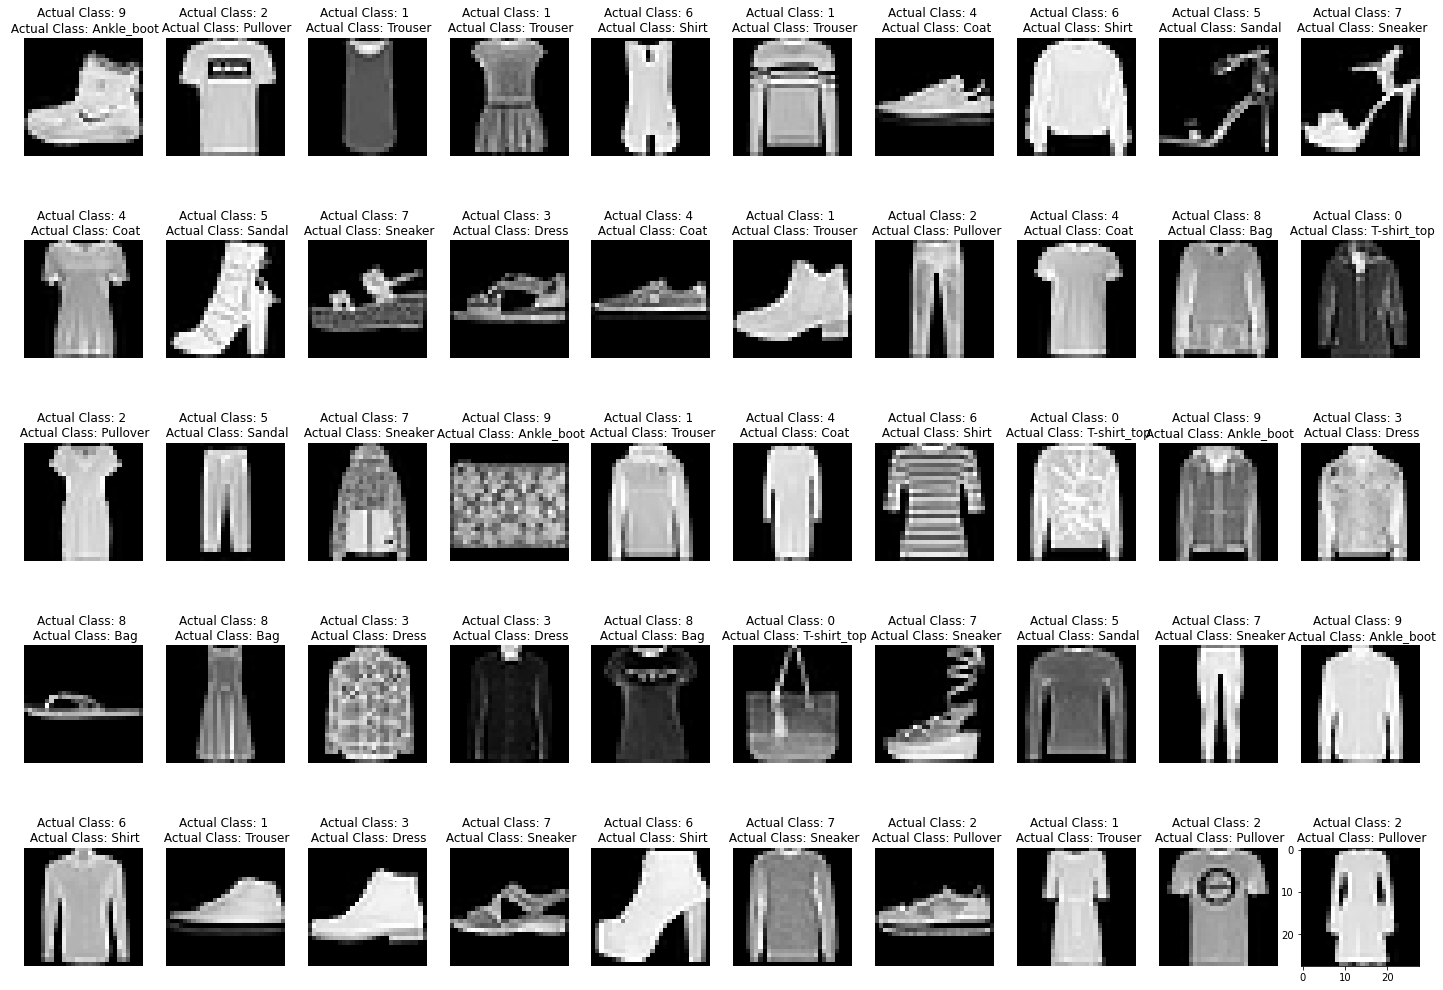

In [228]:
plt.figure(figsize=[25,18])

for i in range(50):
    plt.axis('off')
    plt.subplot(5, 10, i+1)
    plt.imshow(x_train[[i]][0], cmap='gray')
    plt.title(f'Actual Class: {y_test[i]} \n Actual Class: {CLASS_LABELS[y_test[i]]}')
#     plt.show()

## Flatten the Dataset

In [10]:
dataset_flattened = pd.DataFrame(x_train.reshape(len(x_train), 28*28))

In [11]:
dataset_flattened.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
dataset_flattened.shape

(60000, 784)

In [15]:
x_test.shape

(10000, 28, 28)

In [83]:
X_train = (x_train.reshape(TRAIN_IMGS_COUNT, FLATTENED_IMG_DIM))/255
X_test = (x_test.reshape(TEST_IMGS_COUNT, FLATTENED_IMG_DIM))/255

In [25]:
X_toy = X_train[:500]
y_toy = y_train[:500]

In [29]:
X_toy = X_toy/255

In [34]:
X_toy.shape

(500, 784)

In [35]:
y_toy.shape

(500,)

## Model Building

## 1. Artificial Neural Network

In [129]:
ann = Sequential()
ann.add(Dense(784, activation='relu', input_shape=(784,), name='layer_1'))
ann.add(Dense(128, activation='relu', name='layer_2'))
ann.add(Dense(64, activation='relu', name='layer_3'))
ann.add(Dense(10, activation='softmax', name='output'))

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [130]:
ann.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
layer_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
layer_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 724,826
Trainable params: 724,826
Non-trainable params: 0
_________________________________________________________________


In [131]:
%%time
ann.fit(x=X_train, y=y_train, batch_size=100, epochs=80)

Epoch 1/80
600/600 [==============================] - 4s 7ms/step - loss: 0.4890 - accuracy: 0.8254
Epoch 2/80
600/600 [==============================] - 4s 6ms/step - loss: 0.3619 - accuracy: 0.8677
Epoch 3/80
600/600 [==============================] - 4s 6ms/step - loss: 0.3252 - accuracy: 0.8809
Epoch 4/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2982 - accuracy: 0.8895
Epoch 5/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2812 - accuracy: 0.8953
Epoch 6/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2677 - accuracy: 0.8992
Epoch 7/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2546 - accuracy: 0.9037
Epoch 8/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2439 - accuracy: 0.9088
Epoch 9/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2364 - accuracy: 0.9111
Epoch 10/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2260 - accuracy: 0.9140

In [108]:
preds = ann.predict(x=(X_test[1000].reshape(1, 784))/255)
print("Predicted Class is : ", preds[0].argmax())
print("Actual Class is : " , y_test[1000])

Predicted Class is :  5
Actual Class is :  0


In [91]:
X_train.shape

(60000, 784)

In [135]:
y_pred = ann.predict_classes(x=X_test)

In [100]:
type(y_pred)

numpy.ndarray

In [132]:
score = ann.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7255288362503052
Test accuracy: 0.8903999924659729


In [136]:
confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[831,   1,  11,  26,   3,   3, 122,   0,   3,   0],
       [  1, 982,   2,   7,   3,   0,   4,   0,   1,   0],
       [ 32,   1, 779,   9,  86,   0,  93,   0,   0,   0],
       [ 28,  16,   8, 881,  34,   0,  31,   0,   2,   0],
       [  2,   1,  81,  23, 810,   0,  81,   0,   2,   0],
       [  0,   0,   0,   0,   0, 980,   0,   7,   0,  13],
       [ 99,   0,  55,  22,  55,   0, 766,   0,   3,   0],
       [  0,   0,   0,   0,   0,  14,   0, 954,   0,  32],
       [ 12,   0,   1,   2,   4,   6,  17,   3, 955,   0],
       [  1,   0,   0,   0,   0,   5,   0,  28,   0, 966]])

In [138]:
result = pd.DataFrame({'Y_TRUE': y_test, 'Y_PRED': y_pred}, columns=['Y_TRUE', 'Y_PRED'])

In [139]:
result.head()

,Y_TRUE,Y_PRED
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [140]:
wrong = result[result.Y_PRED != result.Y_TRUE]

In [141]:
wrong.shape

(1096, 2)

## 2. Artificial Neural Network with reduced Neurons in the first layer

In [143]:
# Model 2

ann1 = Sequential()
ann1.add(Dense(256, activation='relu', input_shape=(784,), name='layer_1'))
ann1.add(Dense(128, activation='relu', name='layer_2'))
ann1.add(Dense(64, activation='relu', name='layer_3'))
ann1.add(Dense(10, activation='softmax', name='output'))

ann1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [144]:
%%time
ann1.fit(x=X_train, y=y_train, batch_size=100, epochs=80)

Epoch 1/80
600/600 [==============================] - 1s 1ms/step - loss: 0.5121 - accuracy: 0.8182
Epoch 2/80
600/600 [==============================] - 1s 1ms/step - loss: 0.3697 - accuracy: 0.8653
Epoch 3/80
600/600 [==============================] - 1s 1ms/step - loss: 0.3305 - accuracy: 0.8781
Epoch 4/80
600/600 [==============================] - 1s 1ms/step - loss: 0.3076 - accuracy: 0.8862
Epoch 5/80
600/600 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.8923
Epoch 6/80
600/600 [==============================] - 1s 1ms/step - loss: 0.2778 - accuracy: 0.8968
Epoch 7/80
600/600 [==============================] - 1s 1ms/step - loss: 0.2613 - accuracy: 0.9019
Epoch 8/80
600/600 [==============================] - 1s 1ms/step - loss: 0.2496 - accuracy: 0.9064
Epoch 9/80
600/600 [==============================] - 1s 1ms/step - loss: 0.2388 - accuracy: 0.9102
Epoch 10/80
600/600 [==============================] - 1s 1ms/step - loss: 0.2295 - accuracy: 0.9130

In [145]:
score = ann1.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7556295990943909
Test accuracy: 0.8895999789237976


## 3. Convolutional Neural Network with Fully Connected Layers

In [152]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [154]:
# Model 3

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu', name='layer_1'))
cnn.add(Dense(128, activation='relu', name='layer_2'))
cnn.add(Dense(64, activation='relu', name='layer_3'))
cnn.add(Dense(10, activation='softmax', name='output'))

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [155]:
cnn.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
layer_1 (Dense)              (None, 256)               409856    
_________________________________________________________________
layer_2 (Dense)              (None, 128)             

In [156]:
%%time
cnn.fit(x=X_train, y=y_train, batch_size=100, epochs=80)

Epoch 1/80
600/600 [==============================] - 10s 16ms/step - loss: 0.5339 - accuracy: 0.8045
Epoch 2/80
600/600 [==============================] - 10s 16ms/step - loss: 0.3321 - accuracy: 0.8787
Epoch 3/80
600/600 [==============================] - 10s 16ms/step - loss: 0.2832 - accuracy: 0.8960
Epoch 4/80
600/600 [==============================] - 10s 16ms/step - loss: 0.2504 - accuracy: 0.9056
Epoch 5/80
600/600 [==============================] - 10s 16ms/step - loss: 0.2212 - accuracy: 0.9164
Epoch 6/80
600/600 [==============================] - 10s 16ms/step - loss: 0.1986 - accuracy: 0.9266
Epoch 7/80
600/600 [==============================] - 10s 16ms/step - loss: 0.1831 - accuracy: 0.9303
Epoch 8/80
600/600 [==============================] - 10s 16ms/step - loss: 0.1649 - accuracy: 0.9377
Epoch 9/80
600/600 [==============================] - 10s 17ms/step - loss: 0.1447 - accuracy: 0.9443
Epoch 10/80
600/600 [==============================] - 10s 16ms/step - loss: 0.132

In [157]:
score = cnn.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7897547483444214
Test accuracy: 0.9010999798774719


## 4. Convolutional Neural Network with Simple Fully Connected Output Layer

In [158]:
# Model 4

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Flatten())
cnn1.add(Dense(10, activation='softmax', name='output'))

cnn1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [159]:
%%time
cnn1.fit(x=X_train, y=y_train, batch_size=100, epochs=80)

Epoch 1/80
600/600 [==============================] - 9s 15ms/step - loss: 0.5742 - accuracy: 0.7965
Epoch 2/80
600/600 [==============================] - 9s 15ms/step - loss: 0.3662 - accuracy: 0.8710
Epoch 3/80
600/600 [==============================] - 9s 15ms/step - loss: 0.3278 - accuracy: 0.8820
Epoch 4/80
600/600 [==============================] - 9s 15ms/step - loss: 0.3000 - accuracy: 0.8935
Epoch 5/80
600/600 [==============================] - 9s 15ms/step - loss: 0.2825 - accuracy: 0.8985
Epoch 6/80
600/600 [==============================] - 9s 15ms/step - loss: 0.2661 - accuracy: 0.9043
Epoch 7/80
600/600 [==============================] - 9s 15ms/step - loss: 0.2499 - accuracy: 0.9104
Epoch 8/80
600/600 [==============================] - 9s 15ms/step - loss: 0.2381 - accuracy: 0.9142
Epoch 9/80
600/600 [==============================] - 9s 15ms/step - loss: 0.2271 - accuracy: 0.9179
Epoch 10/80
600/600 [==============================] - 9s 15ms/step - loss: 0.2169 - accura

In [160]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6186465620994568
Test accuracy: 0.9017000198364258


## 5. Convolutional Neural Network with Dropout Layer

In [164]:
# Model 5

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Flatten())
cnn1.add(Dropout(0.5))
cnn1.add(Dense(10, activation='softmax', name='output'))

cnn1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [165]:
%%time
cnn1.fit(x=X_train, y=y_train, batch_size=100, epochs=80)

Epoch 1/80
600/600 [==============================] - 9s 15ms/step - loss: 0.6417 - accuracy: 0.7667
Epoch 2/80
600/600 [==============================] - 9s 16ms/step - loss: 0.4329 - accuracy: 0.8444
Epoch 3/80
600/600 [==============================] - 9s 16ms/step - loss: 0.3866 - accuracy: 0.8616
Epoch 4/80
600/600 [==============================] - 9s 16ms/step - loss: 0.3583 - accuracy: 0.8703
Epoch 5/80
600/600 [==============================] - 9s 16ms/step - loss: 0.3410 - accuracy: 0.8774
Epoch 6/80
600/600 [==============================] - 9s 16ms/step - loss: 0.3200 - accuracy: 0.8846
Epoch 7/80
600/600 [==============================] - 9s 16ms/step - loss: 0.3127 - accuracy: 0.8860
Epoch 8/80
600/600 [==============================] - 9s 16ms/step - loss: 0.2995 - accuracy: 0.8917
Epoch 9/80
600/600 [==============================] - 9s 16ms/step - loss: 0.2909 - accuracy: 0.8939
Epoch 10/80
600/600 [==============================] - 9s 16ms/step - loss: 0.2861 - accura

In [166]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2479761689901352
Test accuracy: 0.9151999950408936


## 6. Convolutional Neural Network with 1 Dropout Layer and fully connected network post convolution

In [167]:
# Model 6

cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Flatten())
cnn2.add(Dropout(0.5))
cnn2.add(Dense(256, activation='relu', name='layer_1'))
cnn2.add(Dense(128, activation='relu', name='layer_2'))
cnn2.add(Dense(64, activation='relu', name='layer_3'))
cnn2.add(Dense(10, activation='softmax', name='output'))

cnn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [168]:
%%time
cnn2.fit(x=X_train, y=y_train, batch_size=100, epochs=80)

Epoch 1/80
600/600 [==============================] - 11s 18ms/step - loss: 0.5775 - accuracy: 0.7861
Epoch 2/80
600/600 [==============================] - 11s 18ms/step - loss: 0.3853 - accuracy: 0.8599
Epoch 3/80
600/600 [==============================] - 11s 18ms/step - loss: 0.3314 - accuracy: 0.8780
Epoch 4/80
600/600 [==============================] - 11s 18ms/step - loss: 0.3014 - accuracy: 0.8884
Epoch 5/80
600/600 [==============================] - 11s 18ms/step - loss: 0.2805 - accuracy: 0.8955
Epoch 6/80
600/600 [==============================] - 11s 18ms/step - loss: 0.2626 - accuracy: 0.9027
Epoch 7/80
600/600 [==============================] - 11s 18ms/step - loss: 0.2479 - accuracy: 0.9078
Epoch 8/80
600/600 [==============================] - 11s 18ms/step - loss: 0.2359 - accuracy: 0.9118
Epoch 9/80
600/600 [==============================] - 11s 18ms/step - loss: 0.2257 - accuracy: 0.9162
Epoch 10/80
600/600 [==============================] - 11s 18ms/step - loss: 0.217

In [169]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2917914390563965
Test accuracy: 0.9257000088691711


In [179]:
cnn2.save('fashion-mnist-cnn-dropout')

INFO:tensorflow:Assets written to: fashion-mnist-cnn-dropout/assets


## 7. Convolutional Neural Network with Dropout Layers before every hidden layer of the fully connected network post convolution

In [173]:
# Model 7

cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Flatten())
cnn3.add(Dropout(0.5))
cnn3.add(Dense(256, activation='relu', name='layer_1'))
cnn3.add(Dropout(0.5))
cnn3.add(Dense(128, activation='relu', name='layer_2'))
cnn3.add(Dropout(0.5))
cnn3.add(Dense(64, activation='relu', name='layer_3'))
cnn3.add(Dense(10, activation='softmax', name='output'))

cnn3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [174]:
%%time
cnn3.fit(x=X_train, y=y_train, batch_size=100, epochs=80)

Epoch 1/80
600/600 [==============================] - 11s 19ms/step - loss: 0.7679 - accuracy: 0.7114
Epoch 2/80
600/600 [==============================] - 11s 19ms/step - loss: 0.4798 - accuracy: 0.8239
Epoch 3/80
600/600 [==============================] - 11s 19ms/step - loss: 0.4076 - accuracy: 0.8537
Epoch 4/80
600/600 [==============================] - 11s 19ms/step - loss: 0.3729 - accuracy: 0.8653
Epoch 5/80
600/600 [==============================] - 11s 19ms/step - loss: 0.3476 - accuracy: 0.8759
Epoch 6/80
600/600 [==============================] - 11s 19ms/step - loss: 0.3316 - accuracy: 0.8817
Epoch 7/80
600/600 [==============================] - 12s 20ms/step - loss: 0.3165 - accuracy: 0.8855
Epoch 8/80
600/600 [==============================] - 12s 20ms/step - loss: 0.3053 - accuracy: 0.8899
Epoch 9/80
600/600 [==============================] - 12s 20ms/step - loss: 0.2976 - accuracy: 0.8914
Epoch 10/80
600/600 [==============================] - 12s 21ms/step - loss: 0.290

In [175]:
score = cnn3.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.21982377767562866
Test accuracy: 0.920799970626831


## 8. Convolutional Neural Network with 2 Dropout Layers and fully connected network post convolution

In [176]:
# Model 8

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Flatten())
cnn4.add(Dropout(0.5))
cnn4.add(Dense(256, activation='relu', name='layer_1'))
cnn4.add(Dropout(0.5))
cnn4.add(Dense(128, activation='relu', name='layer_2'))
cnn4.add(Dense(64, activation='relu', name='layer_3'))
cnn4.add(Dense(10, activation='softmax', name='output'))

cnn4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [177]:
%%time
cnn4.fit(x=X_train, y=y_train, batch_size=100, epochs=80)

Epoch 1/80
600/600 [==============================] - 13s 21ms/step - loss: 0.6617 - accuracy: 0.7517
Epoch 2/80
600/600 [==============================] - 13s 21ms/step - loss: 0.4324 - accuracy: 0.8402
Epoch 3/80
600/600 [==============================] - 13s 21ms/step - loss: 0.3785 - accuracy: 0.8601
Epoch 4/80
600/600 [==============================] - 12s 21ms/step - loss: 0.3426 - accuracy: 0.8738
Epoch 5/80
600/600 [==============================] - 12s 20ms/step - loss: 0.3180 - accuracy: 0.8826
Epoch 6/80
600/600 [==============================] - 12s 20ms/step - loss: 0.3084 - accuracy: 0.8852
Epoch 7/80
600/600 [==============================] - 13s 21ms/step - loss: 0.2949 - accuracy: 0.8908
Epoch 8/80
600/600 [==============================] - 13s 21ms/step - loss: 0.2834 - accuracy: 0.8938
Epoch 9/80
600/600 [==============================] - 12s 20ms/step - loss: 0.2760 - accuracy: 0.8977
Epoch 10/80
600/600 [==============================] - 12s 20ms/step - loss: 0.267

In [178]:
score = cnn4.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2191419005393982
Test accuracy: 0.9246000051498413


## Visualizing the Predictions from Test Set using Model-6

In [205]:
sample_test_images = x_test[:50]
sample_test_images_classes = y_test[:50]
sample_test_images_classes

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2], dtype=uint8)

In [184]:
sample_image_predictions = cnn2.predict_classes(sample_test_images)
sample_image_predictions

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 0, 9,
       4, 7, 2, 1, 6, 2])

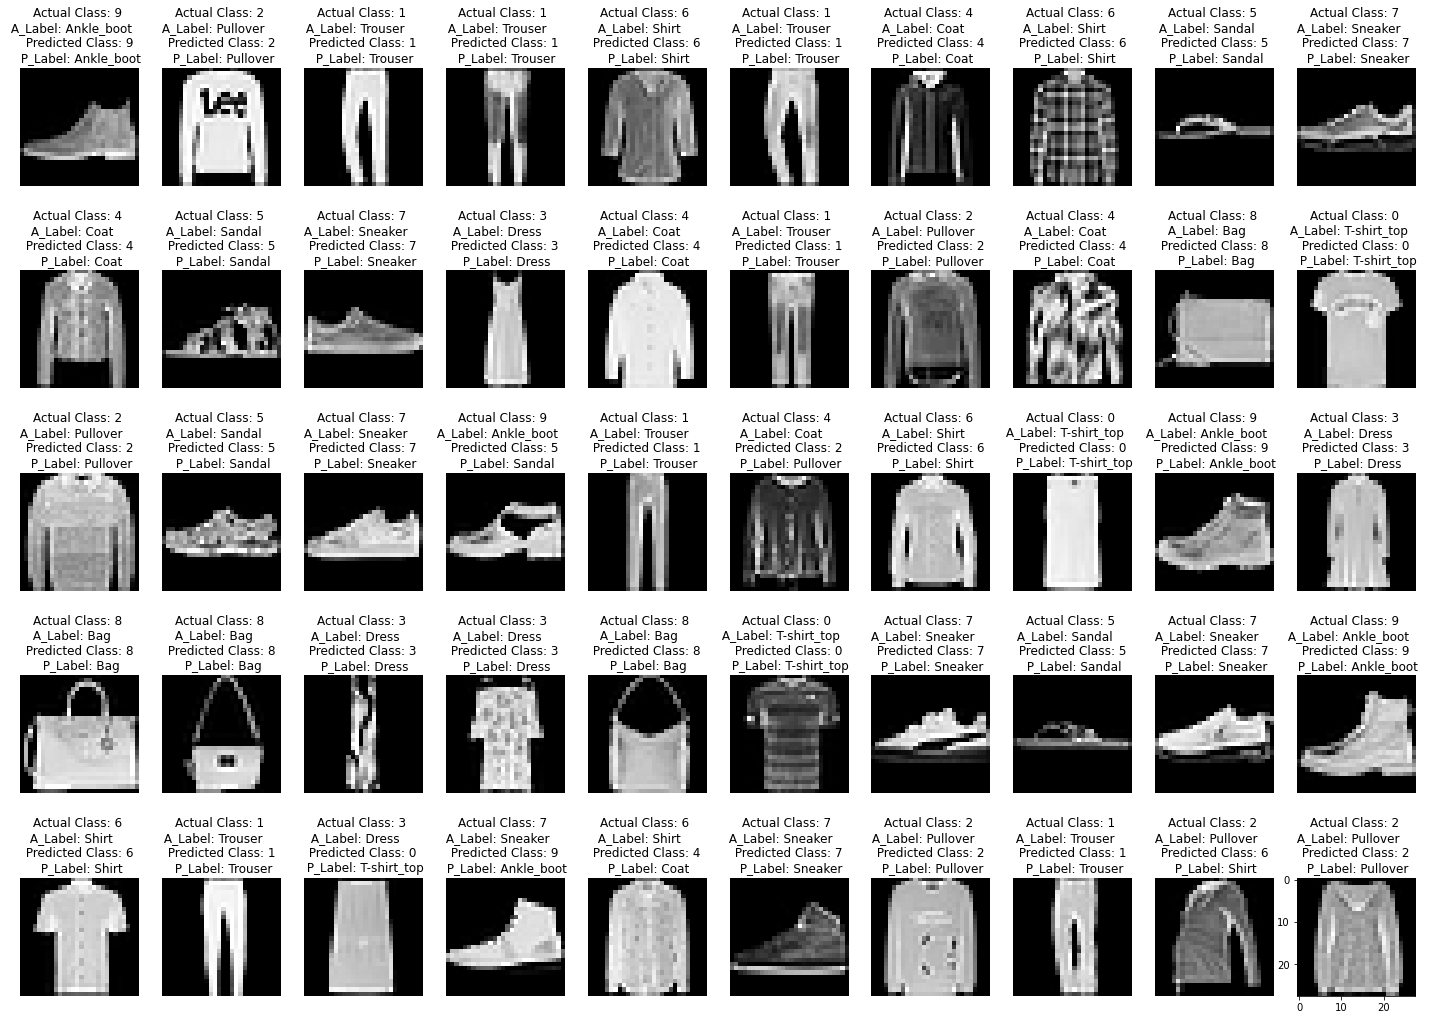

In [218]:
plt.figure(figsize=[25,18])

for i in range(len(sample_test_images)):
    plt.axis('off')
    plt.subplot(5, 10, i+1)
    plt.imshow(sample_test_images[[i]][0], cmap='gray')
    plt.title(f'Actual Class: {sample_test_images_classes[i]} \n A_Label: {CLASS_LABELS[sample_test_images_classes[i]]} \
    \n Predicted Class: {sample_image_predictions[i]} \n P_Label: {CLASS_LABELS[sample_image_predictions[i]]}')

## Exploring the Incorrect Predictions of the Model

In [229]:
predictions_df = pd.DataFrame({'Y_TRUE': y_test, 'Y_PRED': cnn2.predict_classes(X_test)}, columns=['Y_TRUE', 'Y_PRED'])

In [230]:
predictions_df.head()

,Y_TRUE,Y_PRED
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [231]:
predictions_df['TRUE_LABEL'] = predictions_df.Y_TRUE.map(lambda item: CLASS_LABELS[item])
predictions_df['PREDICTED_LABEL'] = predictions_df.Y_PRED.map(lambda item: CLASS_LABELS[item])

In [232]:
predictions_df.head()

,Y_TRUE,Y_PRED,TRUE_LABEL,PREDICTED_LABEL
0,9,9,Ankle_boot,Ankle_boot
1,2,2,Pullover,Pullover
2,1,1,Trouser,Trouser
3,1,1,Trouser,Trouser
4,6,6,Shirt,Shirt


In [237]:
wrong_predictions_df = predictions_df[predictions_df.Y_PRED != predictions_df.Y_TRUE]
wrong_predictions_df.reset_index(inplace=True)

In [238]:
wrong_predictions_df.head()

,index,Y_TRUE,Y_PRED,TRUE_LABEL,PREDICTED_LABEL
0,23,9,5,Ankle_boot,Sandal
1,25,4,2,Coat,Pullover
2,42,3,0,Dress,T-shirt_top
3,43,7,9,Sneaker,Ankle_boot
4,44,6,4,Shirt,Coat


In [239]:
wrong_predictions_df.columns

Index(['index', 'Y_TRUE', 'Y_PRED', 'TRUE_LABEL', 'PREDICTED_LABEL'], dtype='object')

In [241]:
wrong_predictions_df.columns = ['INCORRECT_INDEX', 'Y_TRUE', 'Y_PRED', 'TRUE_LABEL', 'PREDICTED_LABEL']

In [244]:
wrong_predictions_df.head(10)

,INCORRECT_INDEX,Y_TRUE,Y_PRED,TRUE_LABEL,PREDICTED_LABEL
0,23,9,5,Ankle_boot,Sandal
1,25,4,2,Coat,Pullover
2,42,3,0,Dress,T-shirt_top
3,43,7,9,Sneaker,Ankle_boot
4,44,6,4,Shirt,Coat
5,48,2,6,Pullover,Shirt
6,66,2,6,Pullover,Shirt
7,67,3,4,Dress,Coat
8,68,9,7,Ankle_boot,Sneaker
9,98,4,2,Coat,Pullover


In [243]:
wrong_predictions_df.shape

(743, 5)

In [264]:
wrong_index = list(wrong_predictions_df.INCORRECT_INDEX)
wrong_predictions_images = np.take(x_test, indices=wrong_index, axis=0)


## Visualizing Incorrect Predictions

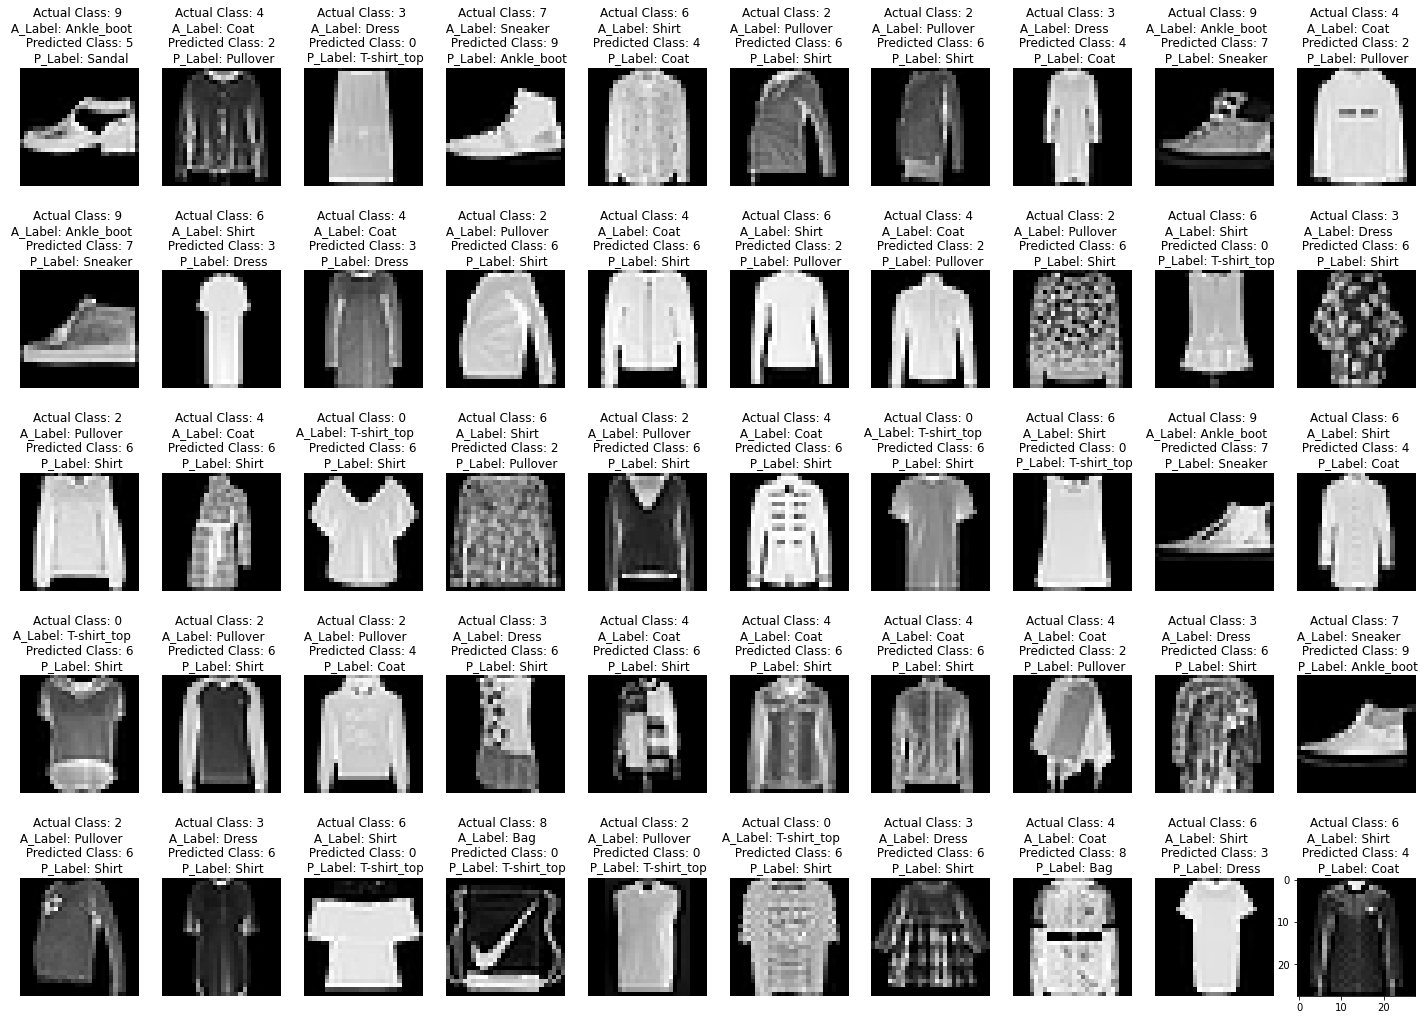

In [271]:
plt.figure(figsize=[25,18])

for i in range(50):
    plt.axis('off')
    plt.subplot(5, 10, i+1)
    plt.imshow(wrong_predictions_images[[i]][0], cmap='gray')
    plt.title(f'Actual Class: {wrong_predictions_df.Y_TRUE[i]} \n A_Label: {CLASS_LABELS[wrong_predictions_df.Y_TRUE[i]]} \
    \n Predicted Class: {wrong_predictions_df.Y_PRED[i]} \n P_Label: {CLASS_LABELS[wrong_predictions_df.Y_PRED[i]]}')

## Conclusion

- Model 6 gives the best performance with accuracy of 92.57% on testing data. 
- Model 8 has the second best performance with accuracy of 92.46% on testing data.

In [1]:
a = {'a': [1,2,3], 'b': [5,6,7]}

In [2]:
import pandas as pd 

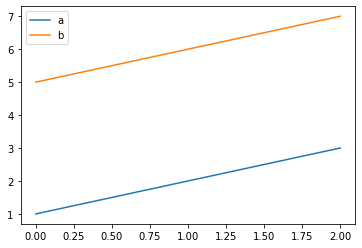

In [4]:
pd.DataFrame(a).plot()